Solution: [2, 6, 1, 7, 4, 0, 3, 5]


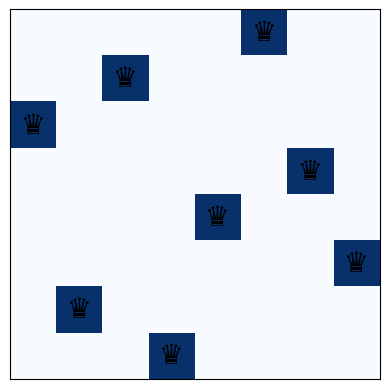

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

N = 8  # Number of queens
POPULATION_SIZE = 100
MUTATION_RATE = 0.2
GENERATIONS = 1000

# Generate a random individual
def generate_individual():
    return [random.randint(0, N-1) for _ in range(N)]

# Compute fitness (number of non-attacking pairs)
def fitness(individual):
    non_attacking_pairs = 0
    for i in range(N):
        for j in range(i + 1, N):
            if individual[i] != individual[j] and abs(individual[i] - individual[j]) != abs(i - j):
                non_attacking_pairs += 1
    return non_attacking_pairs

# Selection using tournament selection
def select(population):
    tournament = random.sample(population, 5)
    return max(tournament, key=lambda x: x[1])

# Crossover (Single Point)
def crossover(parent1, parent2):
    point = random.randint(1, N-1)
    child = parent1[:point] + parent2[point:]
    return child

# Mutation
def mutate(individual):
    if random.random() < MUTATION_RATE:
        individual[random.randint(0, N-1)] = random.randint(0, N-1)
    return individual

# Genetic Algorithm
def genetic_algorithm():
    population = [(generate_individual(), 0) for _ in range(POPULATION_SIZE)]
    population = [(ind, fitness(ind)) for ind, _ in population]
    
    for generation in range(GENERATIONS):
        population = sorted(population, key=lambda x: x[1], reverse=True)
        
        if population[0][1] == (N * (N - 1)) // 2:
            return population[0][0]
        
        new_population = population[:10]  # Elitism
        
        while len(new_population) < POPULATION_SIZE:
            parent1 = select(population)[0]
            parent2 = select(population)[0]
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append((child, fitness(child)))
        
        population = new_population
    
    return population[0][0]  # Return best solution found

# Visualization
def visualize_solution(solution):
    board = np.zeros((N, N))
    for i in range(N):
        board[solution[i], i] = 1
    
    fig, ax = plt.subplots()
    ax.matshow(board, cmap=plt.cm.Blues)
    
    for i in range(N):
        for j in range(N):
            if board[i, j] == 1:
                ax.text(j, i, '♛', va='center', ha='center', fontsize=20)
    
    plt.xticks([])
    plt.yticks([])
    plt.show()

solution = genetic_algorithm()
print("Solution:", solution)
visualize_solution(solution)